In [30]:
# ============================================
# 1. Importación de librerías y configuración
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración estética
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

# --- Rutas automáticas ---
DATA_DIR = "/kaggle/input/titanic/"

# Cargar los datos limpios directamente desde input
train = pd.read_csv(os.path.join(DATA_DIR, "train_clean.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "test_clean.csv"))
gender = pd.read_csv(os.path.join(DATA_DIR, "gender_submission_clean.csv"))

# Unir test y gender para ver etiquetas completas
test_full = pd.merge(test, gender, on="PassengerId", how="left")

print("✅ Datos cargados correctamente")
print("Train shape:", train.shape)
print("Test + Gender shape:", test_full.shape)

✅ Datos cargados correctamente
Train shape: (891, 11)
Test + Gender shape: (418, 11)


In [32]:
# ============================================
# 2. Exploración general
# ============================================

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- Primeras filas del dataset ---
display(train.head())

# --- Información general ---
print("\n📋 Información general del dataset:\n")
train_info = train.info()
print(train_info)

# --- Estadísticas descriptivas ---
print("\n📊 Estadísticas descriptivas:\n")
display(train.describe(include="all"))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S



📋 Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

📊 Estadísticas descriptivas:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


Conclusión inicial:

- Columnas numéricas: Age, Fare, SibSp, Parch.
- Categóricas: Sex, Pclass, Embarked.
- Variable objetivo: Survived.

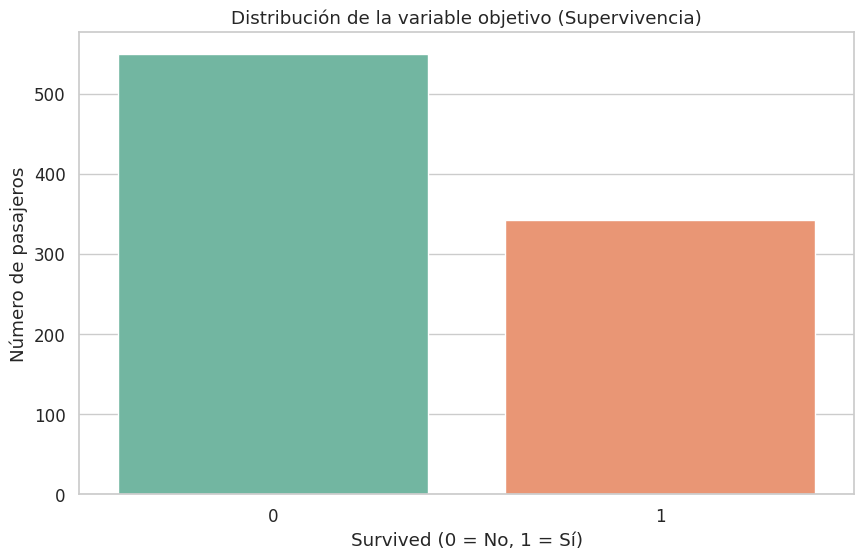

Tasa general de supervivencia: 38.38%


In [33]:
# ============================================
# 3. Distribución de la variable objetivo
# ============================================

sns.countplot(x="Survived", data=train, palette="Set2")
plt.title("Distribución de la variable objetivo (Supervivencia)")
plt.xlabel("Survived (0 = No, 1 = Sí)")
plt.ylabel("Número de pasajeros")
plt.show()

survival_rate = train["Survived"].mean()*100
print(f"Tasa general de supervivencia: {survival_rate:.2f}%")

Conclusión:
Aproximadamente 38% sobrevivieron, 62% no lo hicieron.

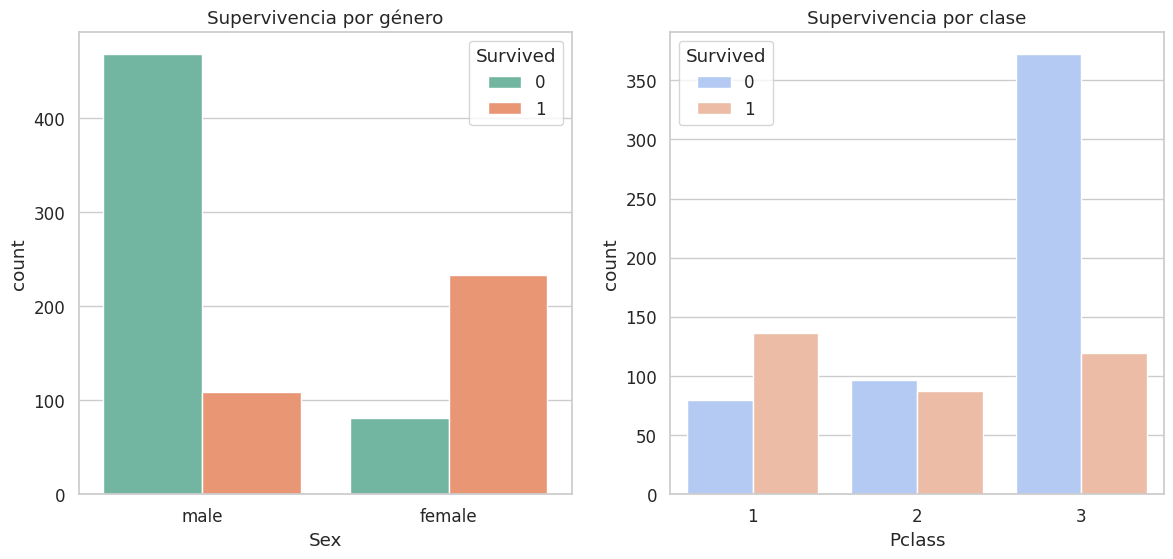

In [34]:
# ============================================
# 4. Análisis demográfico: Sexo y Clase
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[0], palette="Set2")
axes[0].set_title("Supervivencia por género")

sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1], palette="coolwarm")
axes[1].set_title("Supervivencia por clase")
plt.show()

Conclusión:

- Las mujeres tienen una tasa de supervivencia mucho mayor.
- La primera clase tuvo más probabilidad de sobrevivir que la tercera.

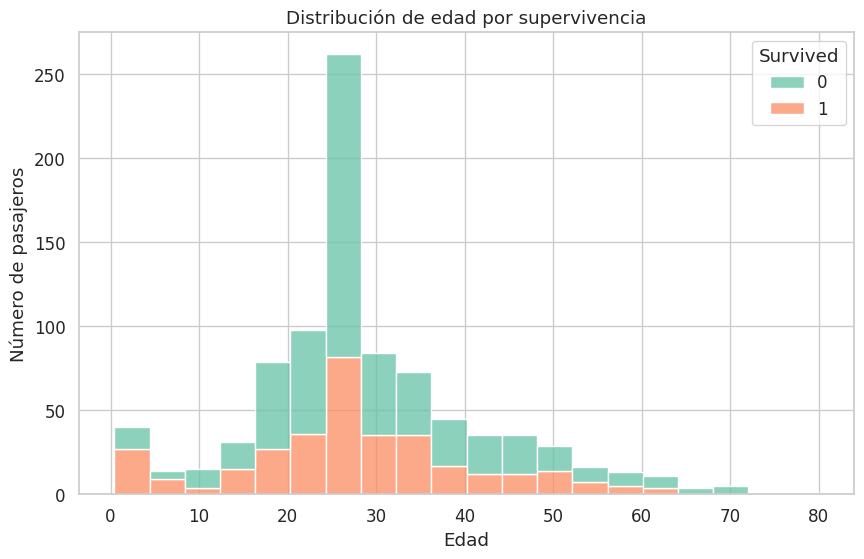

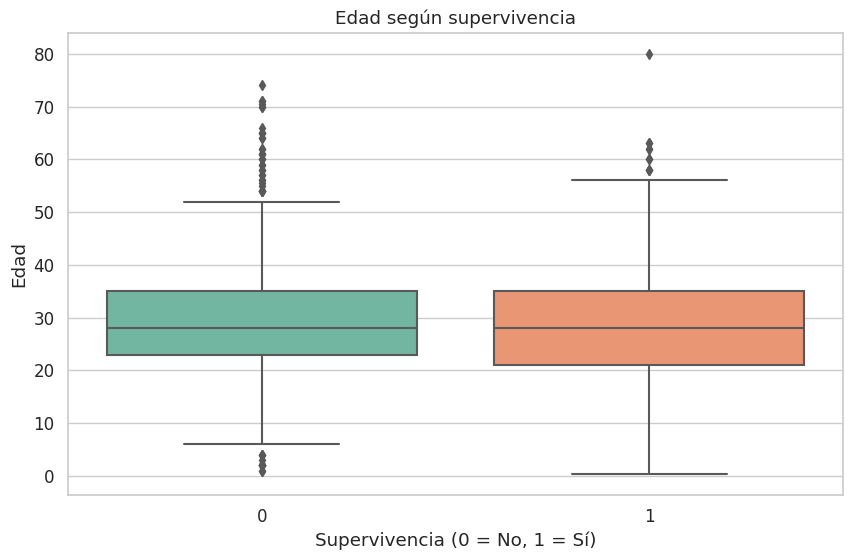

In [36]:
# ============================================
# 5. Análisis por edad
# ============================================

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- Distribución de edad por supervivencia ---
sns.histplot(train, x="Age", hue="Survived", multiple="stack", bins=20, palette="Set2")
plt.title("Distribución de edad por supervivencia")
plt.xlabel("Edad")
plt.ylabel("Número de pasajeros")
plt.show()

# --- Boxplot de edad vs supervivencia ---
sns.boxplot(x="Survived", y="Age", data=train, palette="Set2")
plt.title("Edad según supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

Conclusión:
Los niños y jóvenes tenían mayores tasas de supervivencia, especialmente mujeres y personas de clases altas.

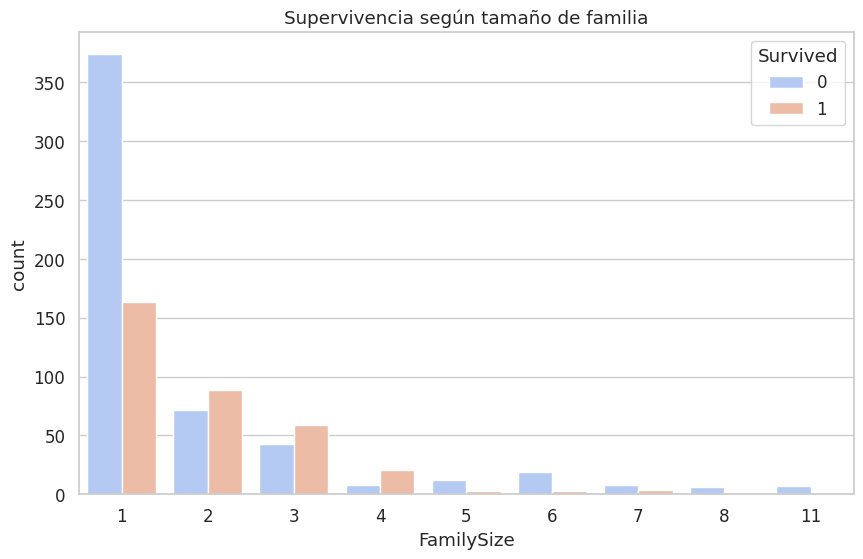

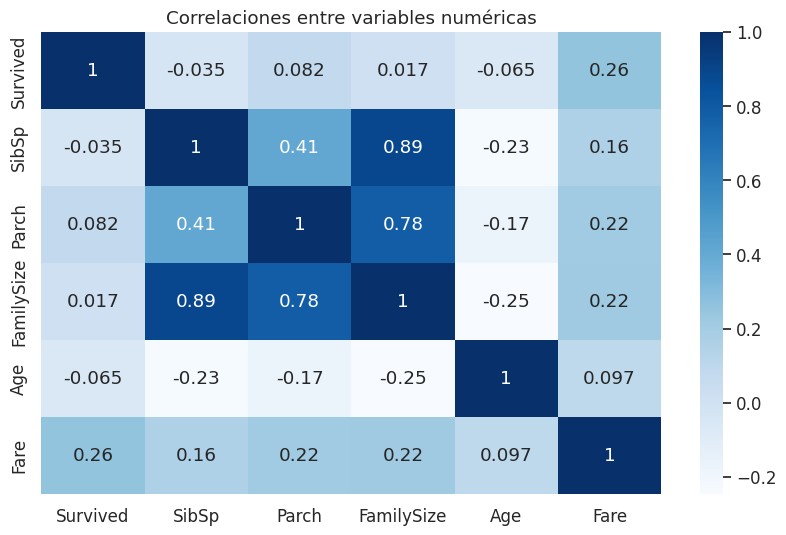

In [37]:
# ============================================
# 6. Relación entre variables familiares
# ============================================

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

sns.countplot(x="FamilySize", hue="Survived", data=train, palette="coolwarm")
plt.title("Supervivencia según tamaño de familia")
plt.show()

corr = train[["Survived", "SibSp", "Parch", "FamilySize", "Age", "Fare"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlaciones entre variables numéricas")
plt.show()

Conclusión:

- Familias pequeñas (2–4 miembros) tuvieron mejores tasas de supervivencia.
- El precio del boleto (Fare) se correlaciona positivamente con la supervivencia.

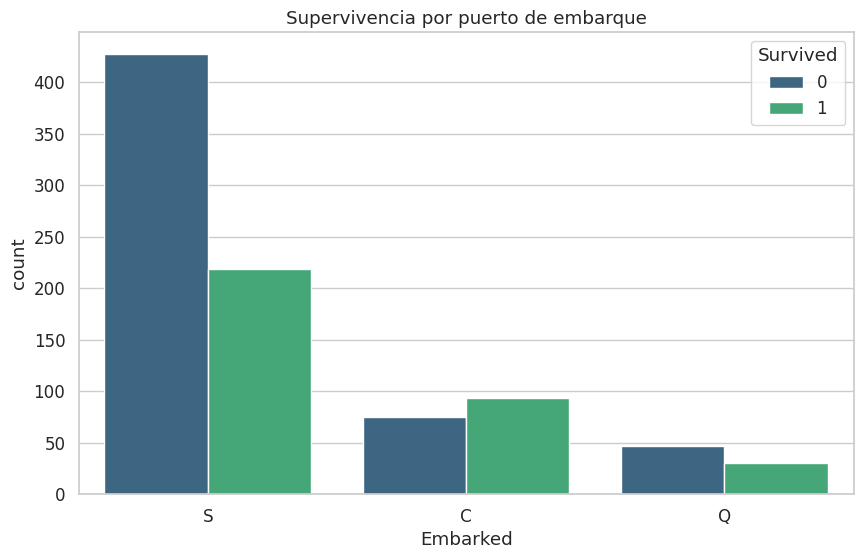

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [38]:
# ============================================
# 7. Análisis por puerto de embarque
# ============================================

sns.countplot(x="Embarked", hue="Survived", data=train, palette="viridis")
plt.title("Supervivencia por puerto de embarque")
plt.show()

train.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)

Conclusión:
Los pasajeros que embarcaron en Cherbourg (C) tuvieron mayor probabilidad de sobrevivir, asociado a clases más altas.

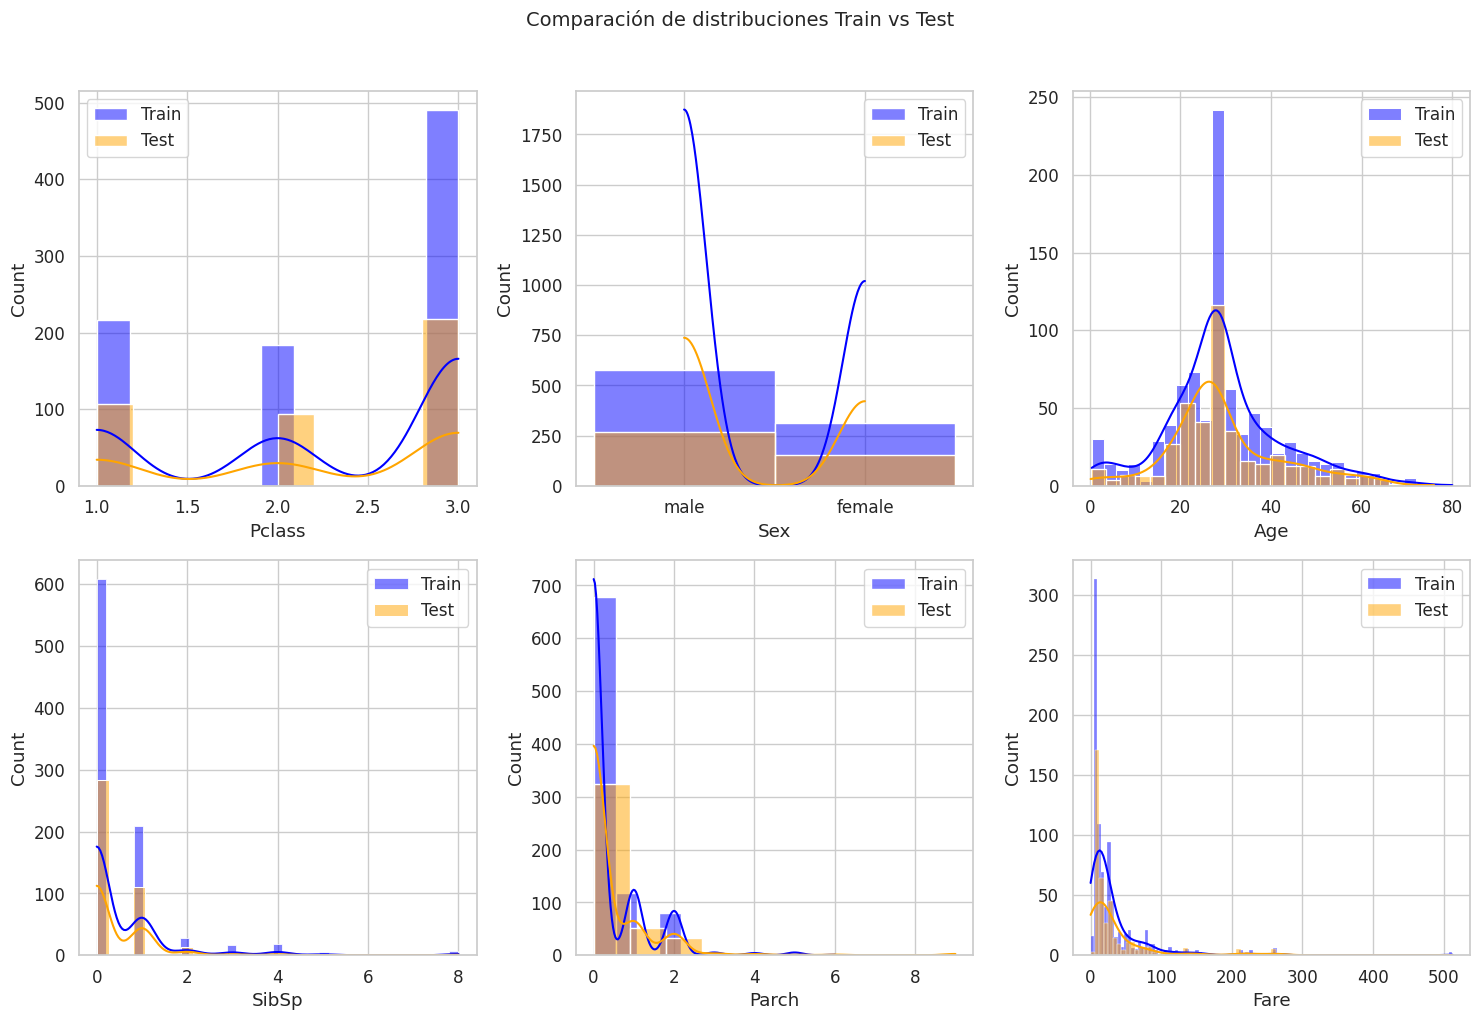

In [39]:
# ============================================
# 8. Comparativa Train vs Test
# ============================================

cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, col in enumerate(cols):
    sns.histplot(train[col], color="blue", label="Train", kde=True, ax=axes[i//3, i%3])
    sns.histplot(test[col], color="orange", label="Test", kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].legend()
plt.suptitle("Comparación de distribuciones Train vs Test", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Conclusión:
Las distribuciones de test y train son similares, lo que indica buena representatividad.

In [40]:
# ============================================
# 9. Insight final y resumen
# ============================================

print("🔍 Principales conclusiones del EDA:")
print("""
1. El 38% de los pasajeros sobrevivieron.
2. Las mujeres sobrevivieron mucho más que los hombres.
3. Las clases altas (1ª clase) tuvieron más probabilidad de sobrevivir.
4. Los niños y familias pequeñas aumentaron sus chances de supervivencia.
5. Embarcar en Cherbourg (C) se asocia con mayor supervivencia.
6. La variable 'Fare' puede reflejar nivel socioeconómico y correlaciona con 'Survived'.
""")

🔍 Principales conclusiones del EDA:

1. El 38% de los pasajeros sobrevivieron.
2. Las mujeres sobrevivieron mucho más que los hombres.
3. Las clases altas (1ª clase) tuvieron más probabilidad de sobrevivir.
4. Los niños y familias pequeñas aumentaron sus chances de supervivencia.
5. Embarcar en Cherbourg (C) se asocia con mayor supervivencia.
6. La variable 'Fare' puede reflejar nivel socioeconómico y correlaciona con 'Survived'.

